In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("Hospitality minds dataset.csv")

In [4]:
df.head()

,Type of Hotel,Year,Month,Reservation Date,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Meal,Booking Payment,...,Assigned Room,Booking Changes,Waiting List,Customer,Per Day Charges,Parking at premises,Physical Challenged,Reservation Status,Cancellation,Booking Done
0,Motel,2015,July,03-08-2015,31,28,2,3,Bed & Breakfast,No Deposit,...,A,0,0,Contract,132.0,0,2,Check-Out,0,44
1,Villa,2016,August,30-08-2016,35,25,2,3,Bed & Breakfast,No Deposit,...,A,1,0,Transient,150.0,1,1,Check-Out,0,27
2,Villa,2017,April,23-04-2017,16,21,1,1,Bed & Breakfast,No Deposit,...,A,0,0,Transient-Party,44.0,0,1,Check-Out,0,180
3,Motel,2016,June,29-06-2016,27,27,2,0,Bed & Breakfast,No Deposit,...,D,0,0,Transient,151.0,0,4,Check-Out,0,59
4,Motel,2016,August,22-08-2016,34,20,0,2,Breakfast & Dinner,No Deposit,...,A,0,0,Transient-Party,115.0,0,1,Check-Out,0,313


In [5]:
df.isnull().sum()

Type of Hotel            0
Year                     0
Month                    0
Reservation Date         0
Arrival week             0
Arrival Date             0
Weekend Stays            0
Weekday Stays            0
Meal                     0
Booking Payment          0
Adults                   0
Children                 2
Kids                     0
Country                371
Booking Type             0
Repeated Guest           0
Prev Cancel              0
History                  0
Reserved Room            0
Assigned Room            0
Booking Changes          0
Waiting List             0
Customer                 0
Per Day Charges          0
Parking at premises      0
Physical Challenged      0
Reservation Status       0
Cancellation             0
Booking Done             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type of Hotel        90000 non-null  object 
 1   Year                 90000 non-null  int64  
 2   Month                90000 non-null  object 
 3   Reservation Date     90000 non-null  object 
 4   Arrival week         90000 non-null  int64  
 5   Arrival Date         90000 non-null  int64  
 6   Weekend Stays        90000 non-null  int64  
 7   Weekday Stays        90000 non-null  int64  
 8   Meal                 90000 non-null  object 
 9   Booking Payment      90000 non-null  object 
 10  Adults               90000 non-null  int64  
 11  Children             89998 non-null  float64
 12  Kids                 90000 non-null  int64  
 13  Country              89629 non-null  object 
 14  Booking Type         90000 non-null  object 
 15  Repeated Guest       90000 non-null 

In [7]:
df["Country"].fillna("XYZ",inplace=True)
df["Children"].fillna(0,inplace=True)
df["Children"]=df["Children"].astype(np.int64)

In [8]:
df.columns=df.columns.str.replace(" ","_")

# **EDA**

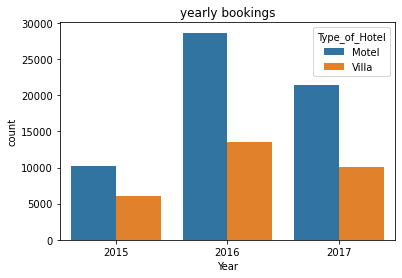

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot (x= 'Year', data= df, hue= 'Type_of_Hotel').set_title ('yearly bookings')
plt.show()

Here we can see bookings in 2016 is high.
and Motel bookings are high as compared to Villas.

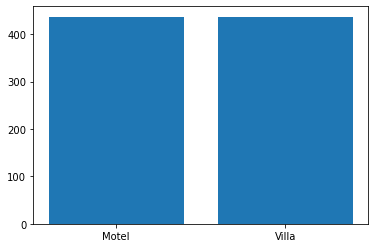

In [10]:
plt.bar(x= "Type_of_Hotel", height= 'Per_Day_Charges', data= df)
plt.show()

There is not much diference in prices of Motels and Villas.
But still bookings are high in Motels.

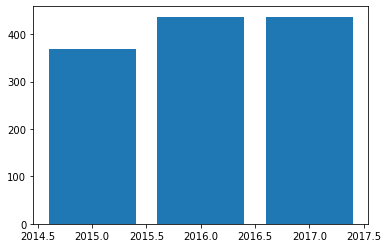

In [12]:
plt.bar(x= "Year", height= 'Per_Day_Charges', data= df)
plt.show()

Prices have been increased yearly.
that is why the bookings decreased in year 2017.

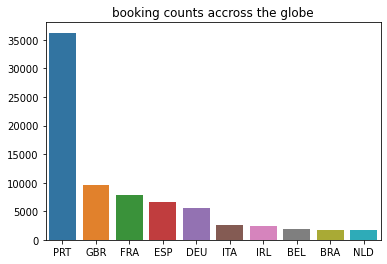

In [13]:
sns.barplot (y= list(df.Country.value_counts().head(10)), x= list(df.Country.value_counts().head(10).index))
plt.title('booking counts accross the globe')
plt.show()

PRT has higher bookings than any other country

in prt bookings are done from online/offline/ something else?

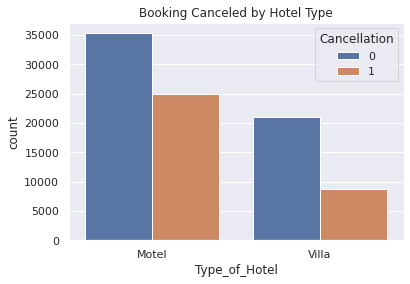

In [27]:
sns.set(style = "darkgrid")
plt.title("Booking Canceled by Hotel Type")
ax = sns.countplot(x = "Type_of_Hotel", hue ='Cancellation' , data = df)


Around 35% cancellation was done by Motel while 20% cancellation done by Villa.

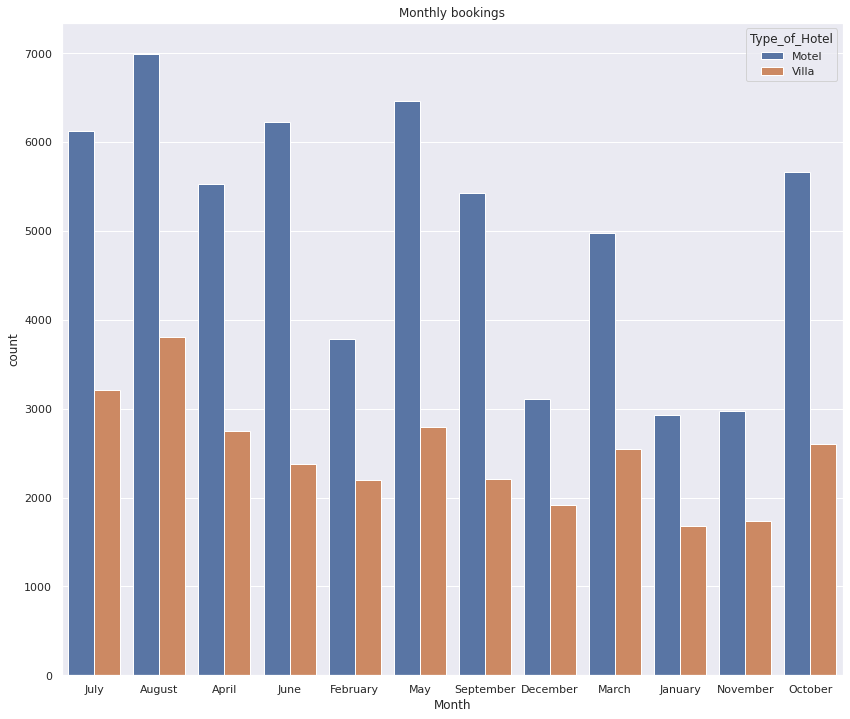

In [28]:
plt.figure(figsize=(14,12))
sns.countplot (x= 'Month', data= df, hue= 'Type_of_Hotel').set_title ('Monthly bookings')
plt.show()

in the month of august the bookings are high for both Motels and Villas


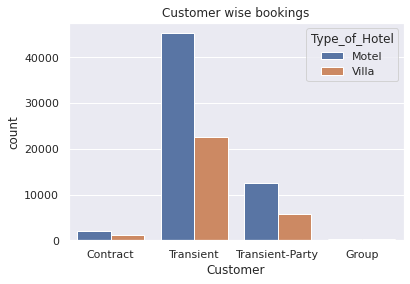

In [29]:
sns.countplot (x= 'Customer', data= df, hue= 'Type_of_Hotel').set_title ('Customer wise bookings')
plt.show()

we can see the transient bookings are more. And that too it is more in Motels.

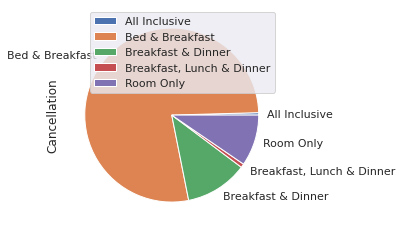

In [35]:
df.groupby(['Meal']).sum().plot(kind='pie', y='Cancellation')

Those who are booking for Breakfast Lunch Dinner have less cancellation.And those who book for Bed and Breakfast Have higher cancellation.

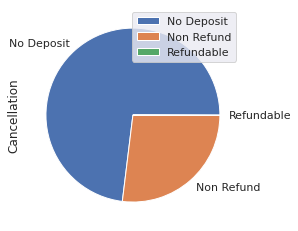

In [37]:
df.groupby(['Booking_Payment']).sum().plot(kind='pie', y='Cancellation')

Those who have not paid deposit have high Cancellation.
But paid deposit and refundable still they are not cancelling but who paid deposit and they know their amount is non refundable still they cancell their bookings. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
